In [55]:
from glob import glob
import pickle
import os
import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline

In [56]:
# file directories
ST_CAP_DIR = "/home/luoyy16/datasets-large/FlickrStyle_v0.9/"
F30_CAP_DIR = "/home/luoyy16/datasets-large/Flickr30kEntities/Sentences/"
F30_IM_DIR = "/home/luoyy16/datasets-large/flickr30k-images"

In [57]:
def style_caps(pfn, capfn):
    with open(pfn, 'rb') as rf:
        cap_fn = pickle.load(rf)
    with open(capfn, 'rb') as rf:
        cap = []
        ctr = 0
        for line in rf:
            try:
                line = line.decode('utf-8')
                ctr+=1
            except: 
                line = line.decode('utf-8', 'replace')
                print("line {} contains weird characters".format(ctr+1))
                print(line)
            if len(line) < 4:
                # for some weird line
                continue
            cap.append(line.lower().rstrip())
    return cap_fn, cap

In [58]:
hum_cap_fn, hum_cap = style_caps(os.path.join(ST_CAP_DIR, 'humor/train.p'),
                                 os.path.join(ST_CAP_DIR, 'humor/funny_train.txt'))

In [59]:
rom_cap_fn, rom_cap = style_caps(os.path.join(ST_CAP_DIR, 'romantic/train.p'),
                                 os.path.join(ST_CAP_DIR, 'romantic/romantic_train.txt'))

line 2531 contains weird characters
a man drives an old-fashioned red race car on the track��speed to finish the line .



In [60]:
print(len(rom_cap), len(rom_cap_fn))

7000 7000


In [61]:
print(len(hum_cap), len(hum_cap_fn))

7000 7000


In [62]:
print("File names lists are equal in order: {}".format(hum_cap_fn == rom_cap_fn))

File names lists are equal in order: True


In [63]:
def get_act_caps(cap_path):
    cap_files = list(glob(cap_path + '*.txt'))
    cap_dict = {}
    for file in cap_files:
        caps = []
        with open(file, 'r') as rf:
            lines = rf.readlines()
        for line in lines:
            line = line.strip().lower().split(' ')
            p_line = []
            for wd in line:
                wd_s = wd.split(']')
                if '[' in wd:
                    continue
                if len(wd_s) > 1:
                    wd_s = [wd_s[0]]
                p_line.extend(wd_s)
            caps.append(p_line)
        im_name = file.split('/')[-1].split('.')[0] + '.jpg'
        cap_dict[im_name] = caps
    return cap_dict

In [64]:
cap_dict_30k = get_act_caps(F30_CAP_DIR)

In [65]:
imn30k = os.listdir(F30_IM_DIR)

In [66]:
# tags
start_tag = '<BOS>'
end_tag = '<EOS>'

In [67]:
cap_dict = {}
imn30kset = set(imn30k)
for i in range(len(rom_cap_fn)):
    imn = rom_cap_fn[i]
    imn = imn.split('_')[0] + '.jpg'
    cap_dict[imn] = {'romantic': [[start_tag] + rom_cap[i].split(' ') + [end_tag]], 
                     'humorous': [[start_tag] + hum_cap[i].split(' ') + [end_tag]], 'actual': ''}

In [68]:
NUM_TRAIN = int(len(rom_cap_fn) * 0.8)
NUM_TEST = int(len(rom_cap_fn) * 0.1)
NUM_VAL = int(len(rom_cap_fn) * 0.1)
print("labelled images split: train: {} val: {}  test: {}".format(NUM_TRAIN, NUM_VAL, NUM_TEST))

labelled images split: train: 5600 val: 700  test: 700


In [69]:
def form_dict(orig_dict, keys):
    dest_dict = {}
    for key in keys:
        dest_dict[key] = orig_dict[key]
    return dest_dict

In [70]:
def split_labelled(cap_dict):
    # split into val and test
    keys = list(cap_dict.keys())
    keys_perm = np.random.permutation(keys)
    keys_tr = keys_perm[:NUM_TRAIN]
    keys_vl = keys_perm[NUM_TRAIN: (NUM_TRAIN + NUM_VAL)]
    keys_ts = keys_perm[(NUM_TRAIN + NUM_VAL):]
    cap_tr = form_dict(cap_dict, keys_tr)
    cap_vl = form_dict(cap_dict, keys_vl)
    cap_ts = form_dict(cap_dict, keys_ts)
    return cap_tr, cap_vl, cap_ts

In [71]:
cap_dict, cap_lval, cap_ltest = split_labelled(cap_dict)
cap_dict_l = cap_dict.copy()

In [83]:
# add actual captions
for imn in imn30k:
    if imn == 'readme.txt':
        continue
    try:
        cap_dict[imn].update({'actual': [[start_tag] + cap + [end_tag] for cap in cap_dict_30k[imn]]})
    except:
        cap_dict[imn] = {'actual': [[start_tag] + cap + [end_tag] for cap in cap_dict_30k[imn]]}
    try:
        cap_lval[imn].update({'actual': [[start_tag] + cap + [end_tag] for cap in cap_dict_30k[imn]]})
    except:
        pass
    try:
        cap_ltest[imn].update({'actual': [[start_tag] + cap + [end_tag] for cap in cap_dict_30k[imn]]})
    except:
        pass

{'humorous': [['<BOS>', 'a', 'shirtless', 'man', 'is', 'doing', 'a', 'skateboard', 'trick', 'to', 'impress', 'full', 'moon', '.', '<EOS>']], 'actual': [['<BOS>', 'the', 'skateboarder', 'enjoys', 'night', 'skating', 'at', 'the', 'skate', 'park', '.', '<EOS>'], ['<BOS>', 'a', 'shirtless', 'man', 'skateboarding', 'with', 'his', 'arms', 'in', 'the', 'air', '.', '<EOS>'], ['<BOS>', 'a', 'shirtless', 'man', 'is', 'doing', 'a', 'skateboard', 'trick', '.', '<EOS>'], ['<BOS>', 'a', 'shirtless', 'man', 'skateboards', 'on', 'a', 'ledge', '.', '<EOS>'], ['<BOS>', 'a', 'shirtless', 'man', 'rides', 'a', 'skateboard', '.', '<EOS>']], 'romantic': [['<BOS>', 'a', 'shirtless', 'man', 'skateboards', 'on', 'a', 'ledge', 'practicing', 'for', 'the', 'big', 'event', '.', '<EOS>']]}


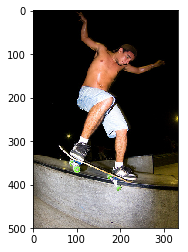

In [84]:
# choose random image
im_keys = list(cap_lval.keys())
ran_key = im_keys[random.choice(range(len(im_keys)))]
caps = cap_lval[ran_key]
img = plt.imread(os.path.join(F30_IM_DIR, ran_key))
plt.imshow(img)
print(caps)

In [85]:
# save to pickles
if not os.path.exists('./pickles'):
    os.mkdir('./pickles')

In [86]:
# labelled + unlabelled captions
with open('./pickles/captions_tr.pkl', 'wb') as wf:
    pickle.dump(file=wf, obj=cap_dict)

In [87]:
# only labelled
with open('./pickles/captions_ltr.pkl', 'wb') as wf:
    pickle.dump(file=wf, obj=cap_dict_l)

In [88]:
# labelled val captions
with open('./pickles/captions_val.pkl', 'wb') as wf:
    pickle.dump(file=wf, obj=cap_lval)

In [89]:
# labelled test captions
with open('./pickles/captions_test.pkl', 'wb') as wf:
    pickle.dump(file=wf, obj=cap_ltest)

In [90]:
# dataset overview
print("Training set size: {}\nLabelled Training set size: {}\nValidation set size: {}\nTest set size: {}".format(
    len(cap_dict.keys()), len(cap_dict_l.keys()),len(cap_lval.keys()), len(cap_ltest.keys())))

Training set size: 31783
Labelled Training set size: 5600
Validation set size: 700
Test set size: 700


In [93]:
# TODO: create 3 evaluation files for futher usage
# format: {'caption': 'A bicycle replica with a clock as the front wheel.',
#  'id': 37,
#  'image_id': 203564}
# use json dump for list of dictionaries

In [138]:
def prepare_eval(caption_dict, label):
    # annotations
    eval_d_list = []
    img_info = []
    for imid in caption_dict.keys():
        ev_dict = {'image_id': int(imid.split('.')[0]),
                   'caption': ' '.join(caption_dict[imid][label][0][1:-1]),
                   'id': int(imid.split('.')[0])}
        im_dict = {'id' : int(imid.split('.')[0]),
                   'file_name': imid}
        eval_d_list.append(ev_dict)
        img_info.append(im_dict)
    return {'annotations': eval_d_list, 'images': img_info}

In [139]:
import json

In [140]:
if not os.path.exists('./annotations'):
    os.makedirs('./annotations')

In [141]:
def dump_to_json(obj, f_name):
    with open('./annotations/' + f_name, 'w') as wf:
        json.dump(obj, wf)

In [142]:
# val
dump_to_json(prepare_eval(cap_lval, 'actual'), 'val_act.json')
dump_to_json(prepare_eval(cap_lval, 'romantic'), 'val_rom.json')
dump_to_json(prepare_eval(cap_lval, 'humorous'), 'val_hum.json')

In [143]:
# test
dump_to_json(prepare_eval(cap_ltest, 'actual'), 'test_act.json')
dump_to_json(prepare_eval(cap_ltest, 'romantic'), 'test_rom.json')
dump_to_json(prepare_eval(cap_ltest, 'humorous'), 'test_hum.json')

In [144]:
! ls ./annotations/

test_act.json  test_rom.json  val_hum.json
test_hum.json  val_act.json   val_rom.json


In [145]:
# test json
with open('./annotations/val_act.json') as rf:
    a = json.load(rf)